11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 59ms/step - loss: 0.2767 - val_loss: 0.1183
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 18s 76ms/step - loss: 0.1123 - val_loss: 0.0960
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 72ms/step - loss: 0.0956 - val_loss: 0.0917
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 55ms/step - loss: 0.0886 - val_loss: 0.0851
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - loss: 0.0846 - val_loss: 0.0820
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0818 - val_loss: 0.0795
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - loss: 0.0798 - val_loss: 0.0793
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 52ms/step - loss: 0.0784 - val_loss: 0.0775
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - loss: 0.0772 - val_loss: 0.0761
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0759 - val_loss: 0.0754
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


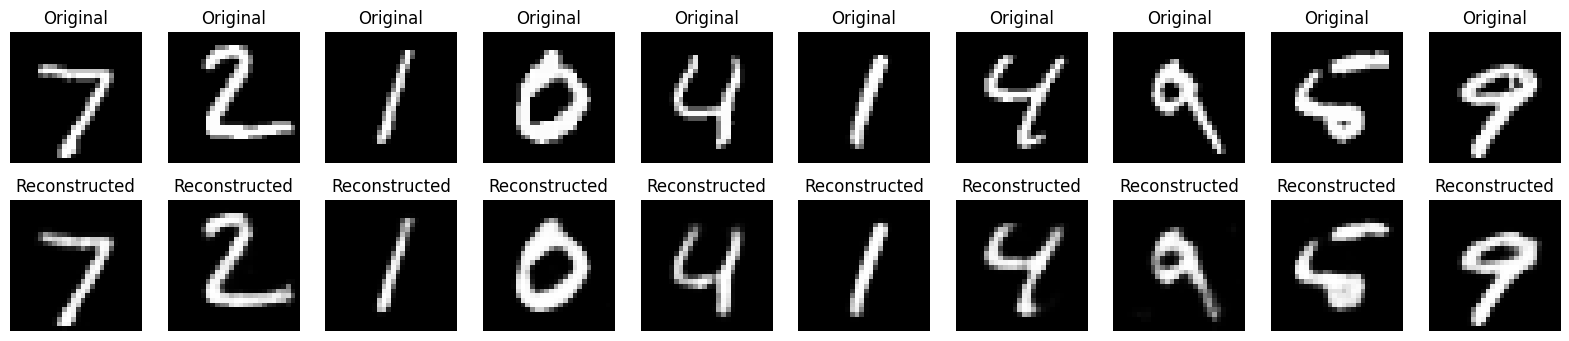

Reconstruction Accuracy: 99.74%


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the data to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the images (28x28 -> 784)
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

# Create the Stacked Autoencoder Model
input_dim = x_train.shape[1]
encoding_dim = 128  # Dimension of the encoded representation

# Encoder
input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(512, activation='relu')(input_layer)
encoded = layers.Dense(256, activation='relu')(encoded)
encoded = layers.Dense(encoding_dim, activation='relu')(encoded)

# Decoder
decoded = layers.Dense(256, activation='relu')(encoded)
decoded = layers.Dense(512, activation='relu')(decoded)
decoded = layers.Dense(input_dim, activation='sigmoid')(decoded)

# Create the autoencoder model
autoencoder = models.Model(input_layer, decoded)

# Create the encoder model (to extract the encoded representation)
encoder = models.Model(input_layer, encoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Evaluate the model and reconstruct the test set
decoded_imgs = autoencoder.predict(x_test)

# Display some of the original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    ax.set_title("Original")
    ax.axis('off')

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    ax.set_title("Reconstructed")
    ax.axis('off')

plt.show()
# Calculate and print reconstruction accuracy
threshold = 0.5
accurate_pixels = np.mean(np.abs(x_test - decoded_imgs) < threshold)
accuracy = accurate_pixels * 100
print(f"Reconstruction Accuracy: {accuracy:.2f}%")